# **RandomForestFromScratch: Random Forest from Scratch on Seeds Dataset**

## **Project Overview**

**RandomForestFromScratch** is a machine learning project that implements the **Random Forest algorithm entirely from scratch**, without relying on scikit-learn’s built-in classifiers.  
The workflow includes **data exploration and visualization**, **data preprocessing (scaling)**, implementation of the **Random Forest classifier**, evaluation using **custom-built metrics**, and deployment of the model via a **Streamlit web application**.

## **Objective**

Develop and deploy a machine learning model built from first principles to classify three varieties of wheat seeds, demonstrating the full pipeline of exploratory analysis, model building, evaluation, and deployment.

## **Dataset**

- **Source**: [Seeds Dataset (UCI Repository)](https://archive.ics.uci.edu/ml/machine-learning-databases/00236/seeds_dataset.txt)  
- **Samples**: 210  
- **Features**: 7 numerical features (Area, Perimeter, Compactness, Kernel Length, Kernel Width, Asymmetry, Groove Length)  
- **Target**: 3 wheat varieties (Kama, Rosa, Canadian)

## **Data Exploration & Preprocessing**

- Conducted **exploratory data analysis (EDA)** with visualizations of feature distributions and class separability.  
- Applied **feature scaling** to standardize input features before training.  

## **Modeling & Algorithm**

Implemented the **Random Forest classifier from scratch**, including:  

- Construction of **decision trees** using the Gini index and information gain for splitting.  
- **Bootstrap sampling** of training data for each tree.  
- **Random feature selection** at each split to reduce correlation between trees.  
- **Majority voting** across trees for final predictions.  

## **Evaluation Metrics**

Evaluation metrics were also implemented **from scratch**, including:  

- Accuracy  
- Precision  
- Recall  
- F1-score  
- Confusion Matrix  
- Classification Report  

## **Performance Results**

**Random Forest Classifier** achieved the following results on the test set:  

- **Accuracy**: `0.90`  
- **Precision**: `0.91`  
- **Recall**: `0.91`  
- **F1-score**: `0.91`  

## **Deployment**

A **[Streamlit web app](https://randomforestfromscratch-xmpa5jh2wpyu8hngsuq8sr.streamlit.app/)** was developed, allowing users to interactively input seed features through sliders and receive predictions of wheat varieties (Kama, Rosa, Canadian).  

This project demonstrates the **end-to-end implementation of a Random Forest classifier from scratch**, including preprocessing, model construction, custom evaluation, and deployment.

Watch a short demo of the app here: [View on LinkedIn](https://www.linkedin.com/posts/rawan-alwadeya-17948a305_machinelearning-fromscratch-randomforest-activity-7364025324336005120-zTf2?utm_source=share&utm_medium=member_desktop&rcm=ACoAAE3YzG0BAZw48kimDDr_guvq8zXgSjDgk_I)

#### **Import Necessary Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from collections import Counter
import joblib
import warnings
warnings.filterwarnings('ignore')

#### **Dataset Loading**

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00236/seeds_dataset.txt"
columns = ["Area","Perimeter","Compactness","KernelLength","KernelWidth","Asymmetry","GrooveLength","Class"]

df = pd.read_csv(url, sep='\s+', names=columns)

In [3]:
df

,Area,Perimeter,Compactness,KernelLength,KernelWidth,Asymmetry,GrooveLength,Class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


#### **Data Exploration and Visualization**

In [4]:
df.sample(10)

,Area,Perimeter,Compactness,KernelLength,KernelWidth,Asymmetry,GrooveLength,Class
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3
71,16.84,15.67,0.8623,5.998,3.484,4.675,5.877,2
113,19.14,16.61,0.8722,6.259,3.737,6.682,6.053,2
76,17.32,15.91,0.8599,6.064,3.403,3.824,5.922,2
180,11.41,12.95,0.8560,5.090,2.775,4.957,4.825,3
174,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,3
56,14.46,14.35,0.8818,5.388,3.377,2.802,5.044,1
178,11.48,13.05,0.8473,5.180,2.758,5.876,5.002,3
37,17.08,15.38,0.9079,5.832,3.683,2.956,5.484,1
101,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Area          210 non-null    float64
 1   Perimeter     210 non-null    float64
 2   Compactness   210 non-null    float64
 3   KernelLength  210 non-null    float64
 4   KernelWidth   210 non-null    float64
 5   Asymmetry     210 non-null    float64
 6   GrooveLength  210 non-null    float64
 7   Class         210 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.3 KB


In [6]:
df.describe()

,Area,Perimeter,Compactness,KernelLength,KernelWidth,Asymmetry,GrooveLength,Class
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,2.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,1.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,2.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,3.000000


In [7]:
df.duplicated().sum()

0

In [8]:
df.skew()

Area            0.399889
Perimeter       0.386573
Compactness    -0.537954
KernelLength    0.525482
KernelWidth     0.134378
Asymmetry       0.401667
GrooveLength    0.561897
Class           0.000000
dtype: float64

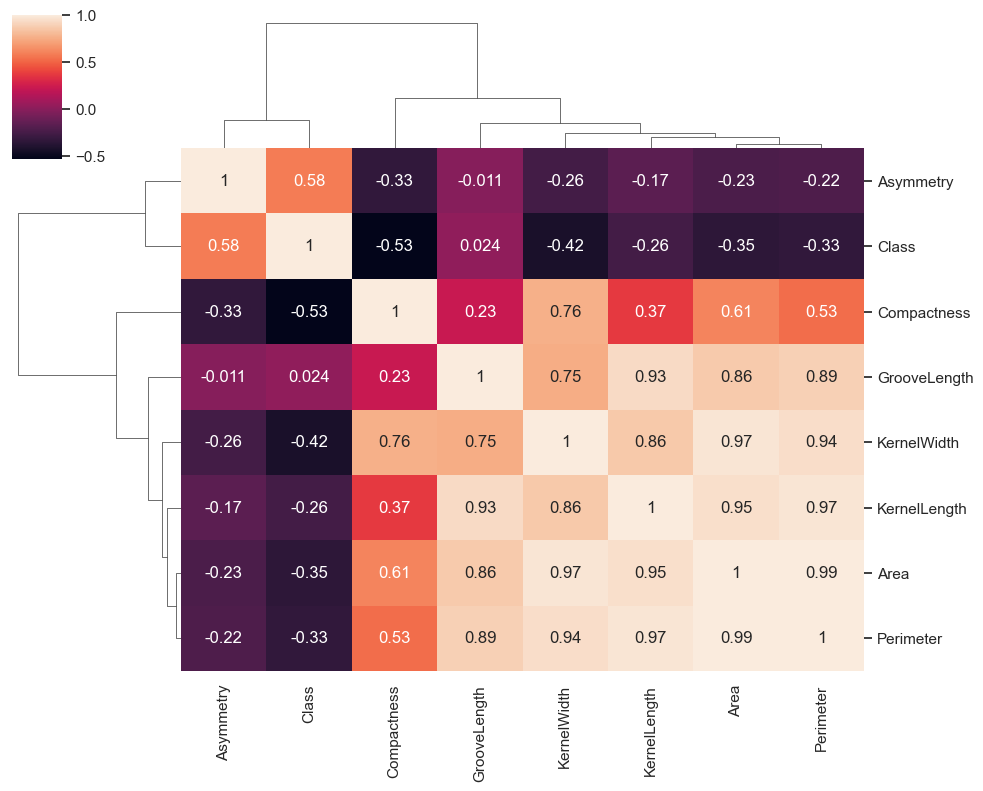

In [9]:
sns.clustermap(df.corr(), annot=True, figsize=(10, 8))
plt.show()

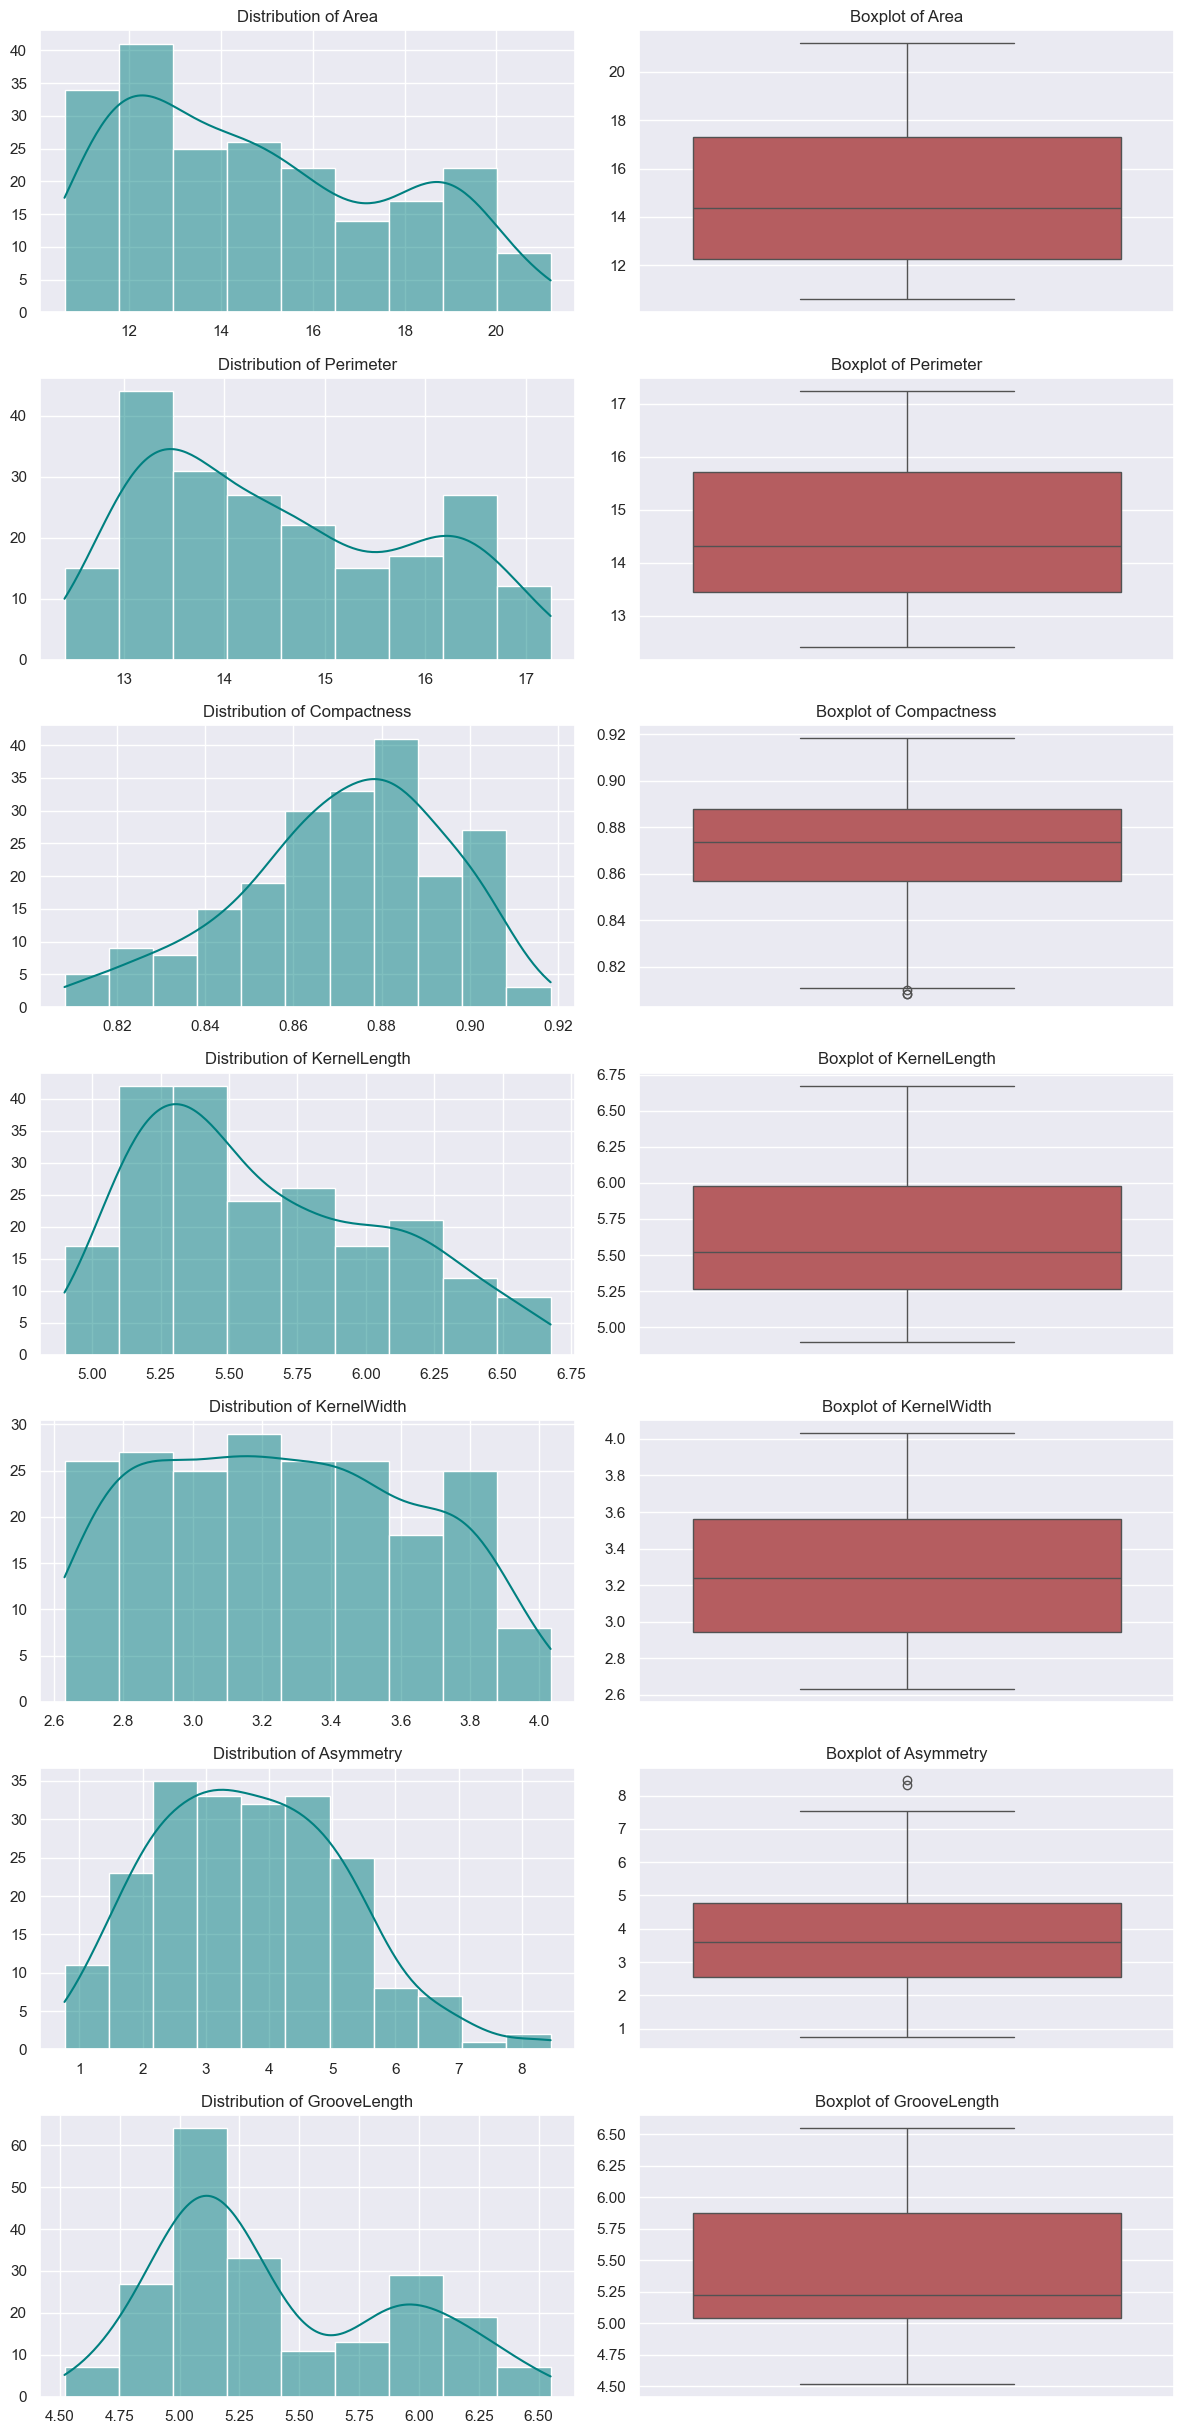

In [10]:
features = ["Area","Perimeter","Compactness","KernelLength","KernelWidth","Asymmetry","GrooveLength"]

plt.figure(figsize=(12, len(features) * 3.5))

for i, col in enumerate(features):
    plt.subplot(len(features), 2, i * 2 + 1)
    sns.histplot(df[col], kde=True, color='teal')
    plt.title(f"Distribution of {col}")
    plt.xlabel('')  
    plt.ylabel('')

    plt.subplot(len(features), 2, i * 2 + 2)
    sns.boxplot(y=df[col], color='r')
    plt.title(f"Boxplot of {col}")
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout()
plt.show()

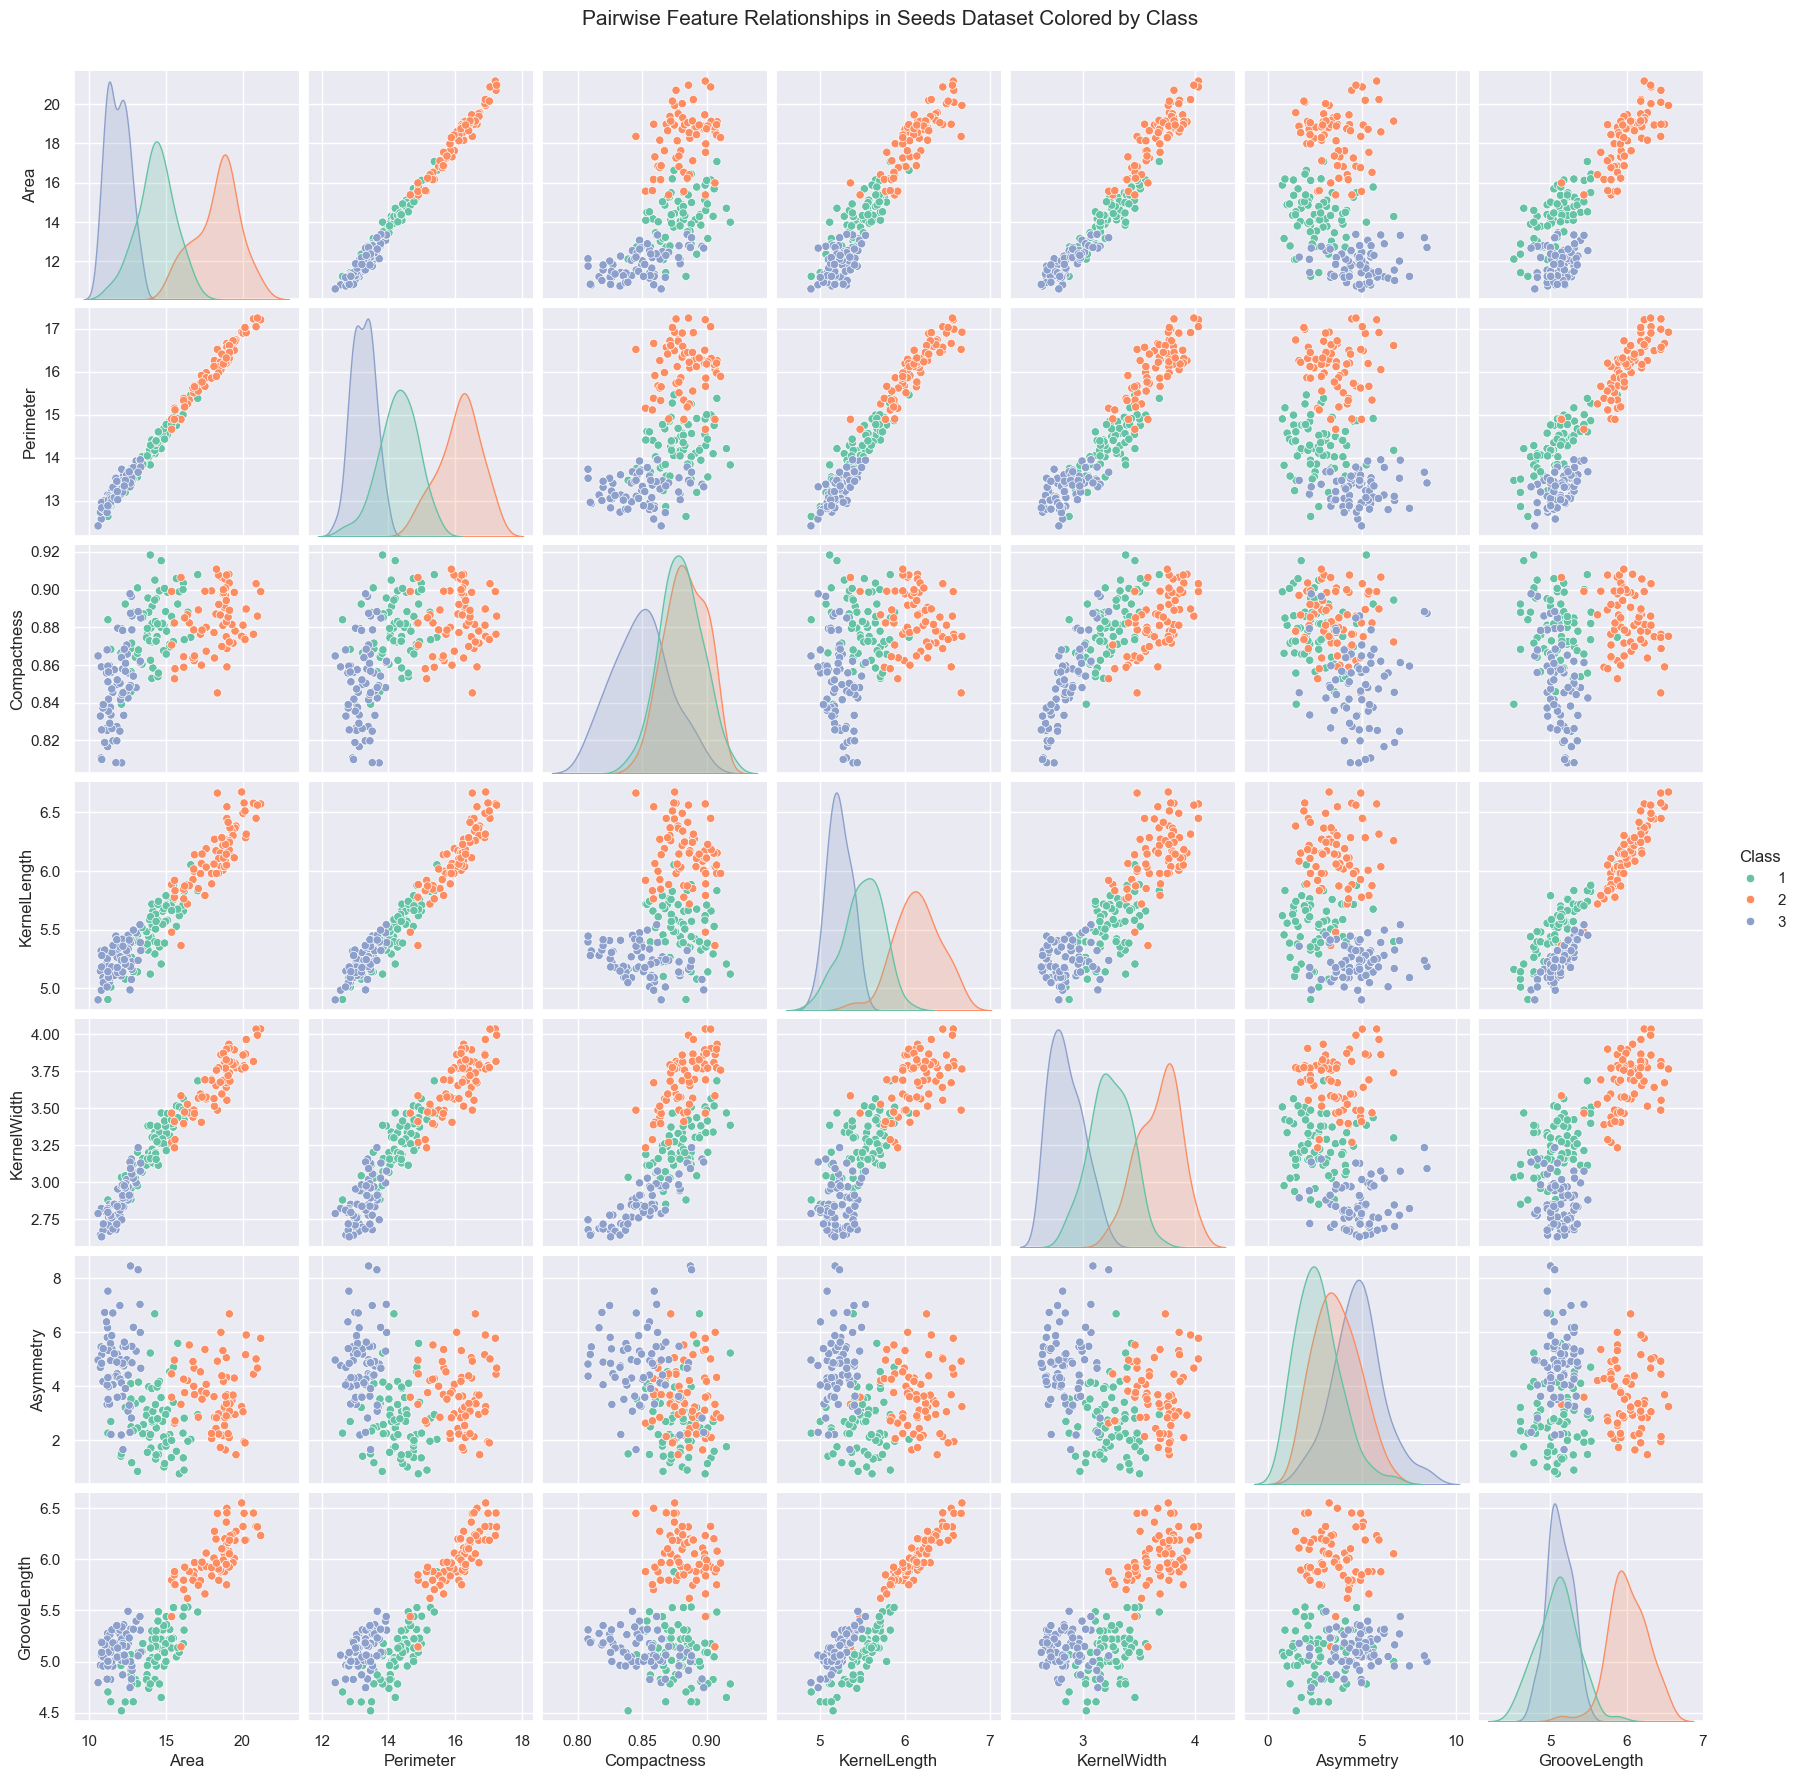

In [11]:
sns.pairplot(df,hue='Class',palette='Set2')
plt.suptitle('Pairwise Feature Relationships in Seeds Dataset Colored by Class', y=1.02, fontsize=15)
plt.show()

In [12]:
df['Class'].value_counts()

Class
1    70
2    70
3    70
Name: count, dtype: int64

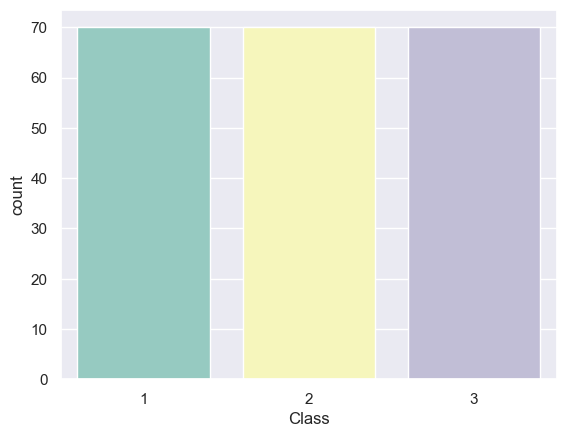

In [13]:
sns.countplot(data = df, x='Class', palette='Set3')
plt.show()

### **Data Preprocessing**

#### **Class Label Remapping**

In [14]:
df['Class'] = df['Class'].map({1: 0, 2: 1, 3: 2})

In [15]:
df['Class'].value_counts()

Class
0    70
1    70
2    70
Name: count, dtype: int64

#### **Splitting Data into Training and Testing Sets**

In [16]:
X = df.drop('Class', axis=1)
X

,Area,Perimeter,Compactness,KernelLength,KernelWidth,Asymmetry,GrooveLength
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175
...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044


In [17]:
y = df['Class']
y

0      0
1      0
2      0
3      0
4      0
      ..
205    2
206    2
207    2
208    2
209    2
Name: Class, Length: 210, dtype: int64

In [18]:
X = X.values
y = y.values

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#### **Feature Scaling using StandardScaler**

In [20]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [21]:
X_train

array([[ 1.39839588,  1.40691641,  0.54076511, ...,  1.32859941,
        -0.21222347,  1.48279154],
       [-0.53336705, -0.48148169, -0.44935973, ..., -0.50286234,
         2.23767528,  0.05269791],
       [ 0.43423001,  0.3180417 ,  1.48046692, ...,  0.81031185,
        -1.55709562, -0.48257725],
       ...,
       [ 1.46701978,  1.42975994,  0.82038369, ...,  1.48972508,
        -0.40196201,  1.55752807],
       [ 0.03964256, -0.00938216,  0.78829631, ...,  0.31350771,
        -0.48614179, -0.48257725],
       [-1.23676207, -1.22008901, -1.33863852, ..., -1.33534495,
         0.41645248, -0.83606084]])

In [22]:
X_test = scaler.transform(X_test)

In [23]:
X_test

array([[-0.33778892, -0.42056562,  0.77454458, -0.43877347, -0.16449844,
         0.20065829, -1.36527628],
       [ 0.56804663,  0.5845495 ,  0.51326164,  0.53193779,  0.55519621,
         1.2335308 ,  0.94145667],
       [-0.32063294, -0.30634799,  0.07779007, -0.11371878, -0.2960844 ,
        -1.04333174, -0.81182197],
       [-0.16966035, -0.27588996,  1.10000228, -0.55677278,  0.1389549 ,
        -0.81751615, -0.92493672],
       [-1.25048685, -1.33430663, -0.53645405, -1.21801417, -1.17959014,
         2.56437299, -0.92291681],
       [ 1.61112998,  1.65058068,  0.31156954,  1.66517641,  1.37425168,
        -1.47892869,  1.73527983],
       [ 1.40182707,  1.23939722,  1.6775751 ,  0.92378455,  1.70993015,
         0.43315482,  0.67886885],
       [ 0.4445236 ,  0.61500753, -0.56395751,  0.28035437,  0.34036199,
         0.40108633,  0.58393326],
       [ 1.79298333,  1.84094339,  0.16030047,  2.1037776 ,  1.40916224,
        -1.15623954,  2.09078333],
       [-1.20588131, -1.1591

### **Random Forest from Scratch**

In [24]:
class SimpleDecisionTree:
    def __init__(self, max_depth=None, min_samples_split=2, n_features=None):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.n_features = n_features
        self.feature_index = None
        self.threshold = None
        self.left = None
        self.right = None
        self.label = None

    def fit(self, X, y, depth=0):
        if len(set(y)) == 1 or (self.max_depth is not None and depth >= self.max_depth) or len(y) < self.min_samples_split:
            self.label = Counter(y).most_common(1)[0][0]
            return

        n_samples, n_features = X.shape
        feat_idxs = np.random.choice(n_features, self.n_features, replace=False) 

        best_gain = -1
        split_idx, split_thresh = None, None

        for feat in feat_idxs:
            thresholds = np.unique(X[:, feat])
            for t in thresholds:
                left_idx = X[:, feat] <= t
                right_idx = X[:, feat] > t

                if len(y[left_idx]) == 0 or len(y[right_idx]) == 0:
                    continue

                gain = self._information_gain(y, y[left_idx], y[right_idx])
                if gain > best_gain:
                    best_gain = gain
                    split_idx, split_thresh = feat, t

        if best_gain == -1:  # no split found -> leaf
            self.label = Counter(y).most_common(1)[0][0]
            return

        self.feature_index = split_idx
        self.threshold = split_thresh
        left_idx = X[:, split_idx] <= split_thresh
        right_idx = X[:, split_idx] > split_thresh

        self.left = SimpleDecisionTree(max_depth=self.max_depth,
                                       min_samples_split=self.min_samples_split,
                                       n_features=self.n_features)
        self.left.fit(X[left_idx], y[left_idx], depth+1)

        self.right = SimpleDecisionTree(max_depth=self.max_depth,
                                        min_samples_split=self.min_samples_split,
                                        n_features=self.n_features)
        self.right.fit(X[right_idx], y[right_idx], depth+1)

    def _gini(self, y):
        counts = np.bincount(y)
        probs = counts / len(y)
        return 1 - np.sum(probs**2)

    def _information_gain(self, parent, l_child, r_child):
        w_left = len(l_child) / len(parent)
        w_right = 1 - w_left
        return self._gini(parent) - (w_left * self._gini(l_child) + w_right * self._gini(r_child))

    def predict(self, x):
        if self.label is not None:
            return self.label
        if x[self.feature_index] <= self.threshold:
            return self.left.predict(x)
        else:
            return self.right.predict(x)


class RandomForestScratch:
    def __init__(self, n_estimators=10, max_depth=None, min_samples_split=2):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.trees = []

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.trees = []
        n_features_sub = int(np.sqrt(n_features))  

        for _ in range(self.n_estimators):
            idxs = np.random.choice(n_samples, n_samples, replace=True)
            X_s, y_s = X[idxs], y[idxs]

            tree = SimpleDecisionTree(max_depth=self.max_depth,
                                      min_samples_split=self.min_samples_split,
                                      n_features=n_features_sub)
            tree.fit(X_s, y_s)
            self.trees.append(tree)

    def predict(self, X):
        tree_preds = np.array([[tree.predict(x) for tree in self.trees] for x in X])
        y_pred = [Counter(tree_preds[i]).most_common(1)[0][0] for i in range(len(X))]
        return np.array(y_pred)


#### **Evaluation Metrics from Scratch**

In [25]:
def confusion_matrix(y_true, y_pred):
    classes = np.unique(np.concatenate([y_true, y_pred]))
    matrix = np.zeros((len(classes), len(classes)), dtype=int)
    for true, pred in zip(y_true, y_pred):
        matrix[true][pred] += 1
    return matrix, classes


def accuracy_score(y_true, y_pred):
    return np.mean(y_true == y_pred)


def precision_recall_f1(cm):
    n_classes = cm.shape[0]
    precision = []
    recall = []
    f1 = []

    for i in range(n_classes):
        TP = cm[i, i]
        FP = cm[:, i].sum() - TP
        FN = cm[i, :].sum() - TP

        prec = TP / (TP + FP) if (TP + FP) > 0 else 0
        rec  = TP / (TP + FN) if (TP + FN) > 0 else 0
        f1_i = 2 * prec * rec / (prec + rec) if (prec + rec) > 0 else 0

        precision.append(prec)
        recall.append(rec)
        f1.append(f1_i)

    return precision, recall, f1


def classification_report(y_true, y_pred):
    cm, classes = confusion_matrix(y_true, y_pred)

    report = "Class | Precision | Recall | F1-score | Support\n"
    report += "-"*50 + "\n"

    precisions, recalls, f1s, supports = [], [], [], []

    for i, cls in enumerate(classes):
        tp = cm[i, i]
        fp = cm[:, i].sum() - tp
        fn = cm[i, :].sum() - tp

        precision = tp / (tp + fp) if (tp + fp) > 0 else 0
        recall = tp / (tp + fn) if (tp + fn) > 0 else 0
        f1 = (2 * precision * recall / (precision + recall)) if (precision + recall) > 0 else 0
        support = cm[i, :].sum()

        precisions.append(precision)
        recalls.append(recall)
        f1s.append(f1)
        supports.append(support)

        report += f"{cls:5d} | {precision:9.2f} | {recall:6.2f} | {f1:8.2f} | {support:7d}\n"

    report += "-"*50 + "\n"
    report += f"Macro Avg | {np.mean(precisions):9.2f} | {np.mean(recalls):6.2f} | {np.mean(f1s):8.2f} | {np.sum(supports):7d}\n"

    return report

In [26]:
model_names = []
accuracy_result = []
precision_result = []
recall_result = []
f1_result = []


def evaluate_model(name, model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    cm, classes = confusion_matrix(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)
    prec, rec, f1 = precision_recall_f1(cm)

    model_names.append(name)
    accuracy_result.append(acc)
    precision_result.append(np.mean(prec))
    recall_result.append(np.mean(rec))
    f1_result.append(np.mean(f1))

    print(f"----- {name} -----")
    print("Accuracy:", acc)
    print("Precision:", np.mean(prec))
    print("Recall:", np.mean(rec))
    print("F1-score:", np.mean(f1))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

    print("\nConfusion Matrix:\n", cm)

    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=classes, yticklabels=classes)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

#### **Training and Evaluating Models**

In [27]:
rf = RandomForestScratch(n_estimators=20, max_depth=10)

----- Random Forest -----
Accuracy: 0.9047619047619048
Precision: 0.9095238095238095
Recall: 0.9118589743589745
F1-score: 0.9079365079365079

Classification Report:
 Class | Precision | Recall | F1-score | Support
--------------------------------------------------
    0 |      0.80 |   0.92 |     0.86 |      13
    1 |      0.93 |   0.81 |     0.87 |      16
    2 |      1.00 |   1.00 |     1.00 |      13
--------------------------------------------------
Macro Avg |      0.91 |   0.91 |     0.91 |      42


Confusion Matrix:
 [[12  1  0]
 [ 3 13  0]
 [ 0  0 13]]


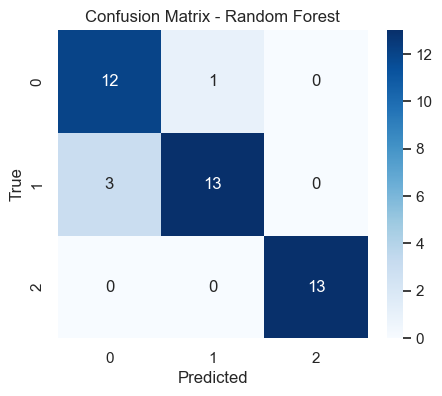

In [28]:
evaluate_model('Random Forest', rf, X_train, X_test, y_train, y_test)

#### **Export Model and Preprocessing Pipeline**

In [30]:
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(rf, 'RandomForest.pkl')

['RandomForest.pkl']

## **Final Thoughts**

This project demonstrated the complete pipeline of building, evaluating, and deploying a **Random Forest classifier from scratch** on the Seeds dataset.  
By implementing the **decision tree construction**, **bootstrap sampling**, **random feature selection**, and **majority voting** mechanisms without relying on machine learning libraries, the project highlights the inner workings of the Random Forest algorithm.  

All evaluation metrics—**accuracy, precision, recall, F1-score, confusion matrix, and classification report**—were also developed from scratch, providing a solid understanding of how classification performance can be measured.  
The model achieved strong results with an overall accuracy of around **90%**, showing that even a scratch-built ensemble method can effectively handle multiclass classification tasks.  

The deployment of the model as a **Streamlit web application** makes the solution interactive and user-friendly, enabling real-time predictions of wheat seed varieties based on feature inputs.  

---

**Thank you for exploring this project.**